In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

file_path = '/content/fandango_scrape (1).csv'
fandango = pd.read_csv(file_path)
fandango.head(100)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
95,Amy (2015),4.5,4.4,729
96,TCM presents Jaws 40th Anniversary (2015),5.0,4.8,716
97,Monkey Kingdom (2015),4.5,4.2,701
98,A Most Violent Year (2014),3.5,3.4,675


In [26]:
fandango.drop('FILM',axis=1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


In [27]:
title='Film Title Name (Year)'

In [28]:
title.split('(')[-1].replace(')','')

'Year'

In [29]:
fandango['YEAR']= fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [30]:
fandango


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [31]:
fandango['YEAR'].value_counts()

,count
YEAR,
2015,478
2014,23
1,7
2016,1
1964,1


<Axes: xlabel='YEAR', ylabel='count'>

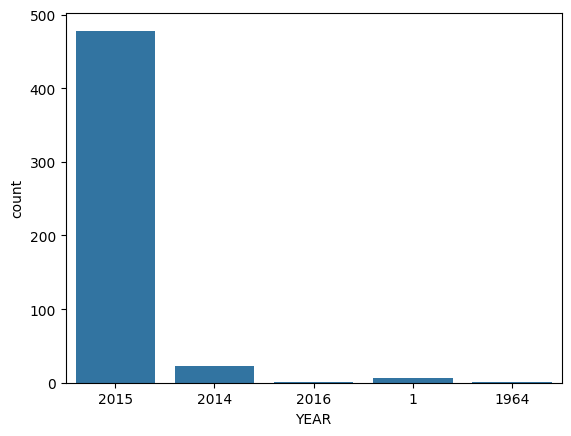

In [32]:
sns.countplot(data= fandango, x='YEAR')

In [33]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [34]:
novotes= fandango['VOTES']==0

In [35]:
novotes.sum()

np.int64(73)

In [36]:
filmreviewed= fandango[~novotes]
filmreviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


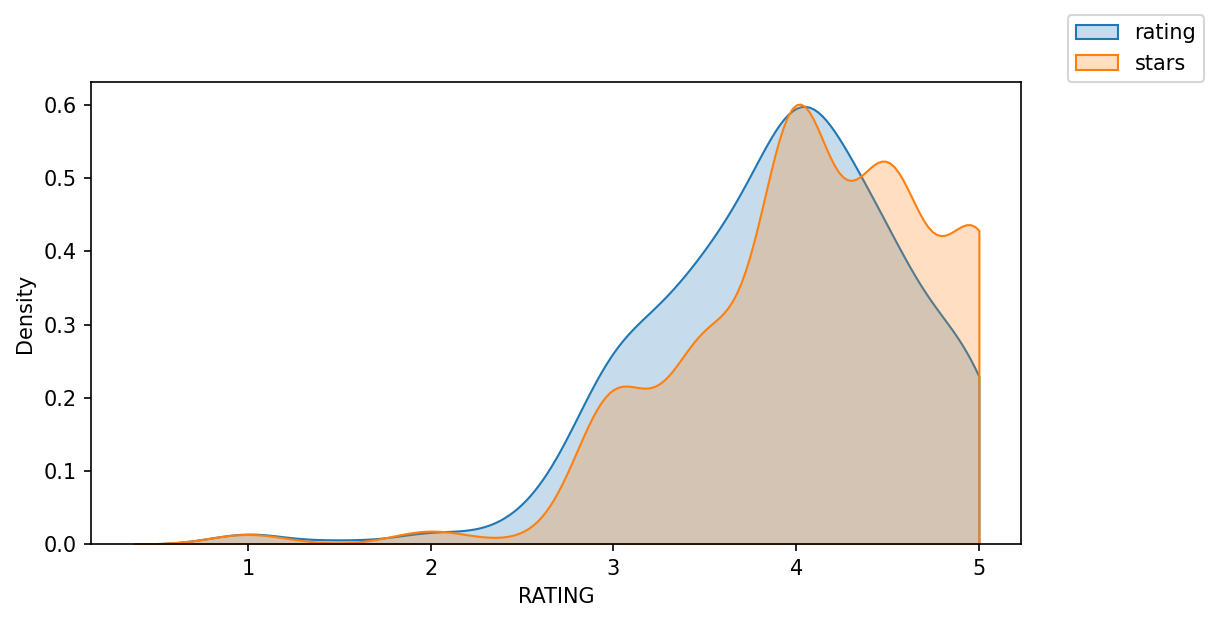

In [38]:
figsize=(8,4)
plt.figure(figsize=figsize, dpi=150)
sns.kdeplot(data=filmreviewed, x='RATING',clip=[0,5],fill=True, label='rating')
sns.kdeplot(data=filmreviewed, x='STARS',clip=[0,5],fill=True, label='stars')
plt.legend(loc=(1.05,1.0))